# 컴퓨터공학부 201502755 김미연
# 기말고사 대체 과제
## <한국어 영화 리뷰 데이터를 이용한 워드 클라우드 그리기 & 분류기 학습하기 >

### 영화 **'맘마 미아!2'** 와 **'캣츠'** 의 **리뷰, 평점, 추천 비추천 수** 를 과제에 이용했습니다.


## 1. 영화 리뷰, 평점 데이터 가져오기


* 저는 중간고사 대체 과제에서도 밝혔 듯, ABBA의 팬입니다. 그래서 ABBA의 노래가 영화 내내 나오는 '맘마 미아!2'라는 영화를 이용하게 됐습니다.


* 또한 '캣츠' 영화의 리뷰, 평점 데이터도 가져왔는데, 이처럼 **영화 두 개의 데이터를 가져온 이유** 에 대해서는 후술하겠습니다.


* 한국어 영화 리뷰 데이터와 평점을 가져오기 위해 BeautifulSoup을 이용했습니다.  


* 다음은 제가 어떤 방식으로 영화 리뷰 데이터와 평점 데이터를 가져왔는지에 대한 설명입니다.


<div align="center"><img src='리뷰_실패.png'></div>

&nbsp;위에 보시는 것처럼 영화 리뷰가 있는 사이트에서 개발자 도구를 이용해 리뷰가 **filtered_ment_0** 와 같은 형태로 저장되어 있음을 쉽게 알아낼 수 있었습니다. 하지만 이 사이트에서 곧바로 BeautifulSoup의 find를 이용해 해당 id들을 추출해내보려 했으나, **추출이 되지 않고 빈 리스트가 나오는 문제가 발생했습니다.** 분명히 개발자 도구를 통해 보면 해당 id가 존재하는데 왜 빈 리스트로 나오는지 의문이었습니다.  

&nbsp;그러던 중, 저는 리뷰 부분에 다음과 같이 따로 **하이퍼링크가 걸려 있음을 알게 되었습니다!** <br>
<br><div align="center"><img src='하이퍼링크.png'></div><br>
&nbsp;위 링크를 따라가보니,

<div align="center"><img src='리뷰창.png'></div>

<br>&nbsp;**위와 같이 리뷰창만 따로 있는 페이지가 나타났습니다!**  
여기서 다시 개발자 도구를 이용해 어떤 태그에 리뷰가 걸려있는지를 확인해보았습니다.

<br><div align="center"><img src='리뷰.png'></div>
<br>&nbsp; 역시 위와 동일하게 **span id "_ filtered_ment_0"** 과 같은 형태로 리뷰가 저장되어있었습니다. 그리고 이번엔 url을 위에서 찾아낸 **하이퍼링크** 로 변경하여 다시 find() 함수를 돌려보았더니, **이번에는 정상적으로 리뷰 데이터가 추출되었습니다!** 개발자 도구를 이용하여 살펴보니, _ filter_ment_라는 id 뒤에 있는 숫자는 한 페이지에 있는 리뷰 데이터마다 0~9까지의 index를 가지고 있는 것으로 확인되었고, 이를 이용해 **for문 내에서 str(index 값)** 과 같은 형식을 취하여 한 페이지에 있는 모든 리뷰 데이터를 가져올 수 있었습니다. <br>

&nbsp;위에서 설명한 방법과 거의 동일하게 매 페이지의 url 값도 가져왔습니다. 리뷰 창의 url은 **https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=164115&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=** 와 같은 형식을 띄고, 마지막 page라는 곳의 숫자만 1부터 현재 페이지의 숫자로 계속 변화를 하는 구조였습니다. 이 역시, for문과 str() 함수를 이용하여 처리해, 많은 페이지의 리뷰 데이터에 직접 접근하는 것이 가능하도록 했습니다.<br>

&nbsp;위의 url을 변경한다고 해서 네이버 영화의 페이지 자체가 변경되는 것이 아니라, 리뷰 창을 전체적으로 띄워놓은 구조는 계속 유지되고, 리뷰의 페이지가 넘어감에 따라 보여주는 리뷰 부분만 변화하는, **부분적으로 하이퍼링크가 걸린 형태** 임을 알아낼 수 있었으며, 이러한 이유 때문에 처음에 **전체 페이지에서 find 함수를 수행하면 아무것도 가져와지지 않는 문제** 가 발생했던 것임을 깨닫게 되었습니다.

<br><div align="center"><img src='평점.png'></div>
<br>&nbsp; 동일한 방법으로 평점 데이터를 가져오는 데에도 성공했습니다. **div 태그** 의 **class가 star_score** 인 곳 안에 평점 데이터가 들어있는 것을 이용해 **find_all** 을 이용해 해당 부분을 모두 가져온 후, 평점 데이터가 직접적으로 들어있는 **em** 태그를 for문을 통해 전부 접근하는 형식을 이용하여 평점 데이터를 가져왔습니다. 다음은 제가 지금까지 설명한 부분에 해당하는 코드들입니다. for문이 반복적으로 사용되는 코드 구현이 다소 아쉬움으로 남습니다.

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

# compile 함수를 사용하기 위한 re import.
import re

In [2]:
from tqdm.notebook import tqdm

# review와 rating 정보를 담을 리스트 선언.
review_list_mammamia = []
rating_list_mammamia = []

review_list_cats = []
rating_list_cats = []

# 번외 : 리뷰의 추천, 비추천 수에 대한 정보를 담을 리스트 선언.
up_down_rate_list_mammamia = []
up_down_rate_list_cats = []

# url에서 바로 find하면 리뷰 부분을 parsing할 수 없었음.
# 학습기의 정확도가 떨어지기 때문에 두 개의 영화에서 자료를 수집.
# tqdm progress bar를 이용하여 진행 상황 체크.
for i in tqdm(range(1, 101)):
    # 리뷰 데이터만 있는 url을 for문을 이용해 순차적으로 가져오기.
    # 1페이지부터 100페이지까지, 한 페이지에는 10개의 리뷰 데이터가 있으므로 영화 당 1000개의 데이터 수집.
    url_mammamia = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=164115&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=" + str(i)
    url_cats = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=185933&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=" + str(i)
    html_m = urlopen(url_mammamia)
    html_c = urlopen(url_cats)

    soup_m = BeautifulSoup(html_m.read(), "html.parser")
    soup_c = BeautifulSoup(html_c.read(), "html.parser")
   
    # 두 영화에 대한 리뷰 데이터 가져오기
    for j in range(0, 10):
        id_i = "_filtered_ment_" + str(j)
        # strip() 함수를 이용해 앞 뒤 여백 제거
        review1 = soup_m.find("span", {"id" : id_i}).text.strip()
        review_list_mammamia.append(review1)
        
    for j in range(0, 10):
        id_i = "_filtered_ment_" + str(j)
        review2 = soup_c.find("span", {"id" : id_i}).text.strip()
        review_list_cats.append(review2)

        
    # 두 영화에 대한 평점 데이터 가져오기
    ratings1 = soup_m.find_all("div", {"class" : "star_score"})
    ratings2 = soup_c.find_all("div", {"class" : "star_score"})
    
    for rating in ratings1:
        rating_text = rating.find_all("em")
        rating_int = int(rating_text[0].text) 
        rating_list_mammamia.append(rating_int)    
        
    for rating in ratings2:
        rating_text = rating.find_all("em")
        rating_int = int(rating_text[0].text) 
        rating_list_cats.append(rating_int)      
        
    # 리뷰에 대한 추천 수와 비추천 수를 저장.
    # down / up의 비율이 0.5 이상이면 비추천의 비율이 너무 높다고 판단.
    # 해당 리뷰는 일반적인 견해가 아닐 거라고 생각해 제외하는 전처리 방법을 고안.
    ups1 = soup_m.find_all(class_=re.compile("^sympathy"))
    downs1 = soup_m.find_all(class_=re.compile("^notSympathy"))
    
    ups2 = soup_c.find_all(class_=re.compile("^sympathy"))
    downs2 = soup_c.find_all(class_=re.compile("^notSympathy"))
    
    # 여러 오브젝트를 for문에서 동시에 사용하기 위해 zip 이용.
    for up, down in zip(ups1, downs1):
        up = int(up.text)
        down = int(down.text)
        up_down_rate_list_mammamia.append(down / up)
        
    for up, down in zip(ups2, downs2):
        up = int(up.text)
        down = int(down.text)
        up_down_rate_list_cats.append(down / up)
    
    # 비정상적인 접근으로 차단되지 않기 위한 sleep 함수 사용.
    time.sleep(0.5)

## 1-2(번외). 리뷰의 추천, 비추천 수 데이터 가져오기에 대한 설명

&nbsp;위 코드에는,

<div align="center"><img src='추천비추천코드.png'></div>

&nbsp;이와 같은 코드가 포함이 되어있습니다. 이 부분은 제 **개인적인 궁금증과 욕심** 으로 인해 탄생한 코드입니다.
나름의 전처리 아이디어를 고안해본 것인데, 아이디어는 다음과 같습니다 : <br>
* 리뷰 데이터에는 리뷰 내용, 리뷰어가 남긴 영화의 평점을 제외하고 해당 **리뷰에 대한 추천, 비추천 수** 가 존재합니다.


* 리뷰 데이터를 여러 개 살펴보던 중, **악의적으로 악평** 을 남기거나, 소위 말하는 '리뷰 알바'가 **별로인 영화를 찬양** 하는 경우를 발견하게 되었고, 이런 리뷰는 **추천 수에 비해 비추천 수가 꽤 많은 비율** 을 차지 하는 경우가 있었습니다.


* 물론 개인적인 견해를 과격하게 표현한 경우도 포함되겠지만, 대다수로부터 비추천을 받은 리뷰는 **긍정 리뷰를 진정한 긍정적인 반응이라 보기 어렵고, 부정 리뷰도 진정한 부정적인 반응이라 보기 어려울 것** 이라는 생각을 하게 되었습니다.

* 그래서 저는 **리뷰 비추천 수 / 리뷰 추천 수** 의 연산 결과가 0.5 이상인 데이터들은 추천 수에 비해 비추천 수가 너무 많다, 이 리뷰는 **정상적인 견해를 넘어선 범주의 비정상적 리뷰** 일 가능성이 있을 것이라 판단, 이 데이터를 제외하고도 학습을 시켜보자는 아이디어를 고안하게 됐습니다.


&nbsp;위와 같은 아이디어를 내는 것까지는 쉬웠지만, 이 추천, 비추천 수는 리뷰나 평점 데이터에 비해 추출해내기가 보다 까다로웠습니다.
<div align="center"><img src='추천비추천.png'></div><br>

&nbsp;위 사진에서 그 이유를 알 수 있습니다. 리뷰의 추천(공감) 데이터를 개발자 도구를 이용해 어디에 속해있는지 봤는데 **strong class의 sympathy** 로 시작하는 곳에 있었습니다.(비추천은 **notSympathy** ) 여기까지 찾는 것은 문제가 아니었습니다. **진짜 문제는 sympathy 뒤에 있는 숫자들이 규칙성을 띄고 있지 않아 for문을 이용해 가져오는 것이 불가능하다는 것이었습니다.**


&nbsp;잠시... 포기할까 생각이 들었으나, 아이디어를 여기까지 낸 것이 아까워서 구글링을 해보기 시작했습니다.


&nbsp;그러던 중, **Beautiful Soup의 매뉴얼을 소개하는 듯한 사이트** (https://www.crummy.com/software/BeautifulSoup/bs4/doc)에 접속하게 되었고, **이 사이트에서 해결 방안을 찾을 수 있었습니다.** 이 사이트에서 **find_all() 함수에서 정규식(regular expression)을 사용하는 방법** 에 대해서 소개를 하고 있었습니다. 해당 부분은 다음과 같습니다 :
<div align="center"><img src='정규식.png'></div><br>

&nbsp;find_all() 함수를 사용할 때, **re.complie** 이라는 메소드 안에 정규식을 넘겨주면 **해당 정규식에 해당하는 클래스 네임, 태그 네임** 등을 모두 가져올 수 있게 되는 것이었습니다. 그래서 **import re** 를 진행했고, **ups1 = soup_m.find_all(class_=re.compile("^sympathy"))** 와 같은 코드를 작성하여, soup 객체로 find_all 해온 것에서 **sympathy** 라는 class로 시작하는 모든 데이터를 가져올 수 있었습니다.


&nbsp;**마침내, 리뷰의 추천, 비추천 수 데이터까지 가져오는 데에 성공한 것입니다.**  
이렇게 가져온 리뷰의 추천, 비추천 수를 이용해 division 연산을 진행한 후, 따로 저장해주었습니다.

In [3]:
# 리뷰, 평점, 리뷰의 추천, 비추천 수 비율을 총괄적으로 담을 리스트 생성.
review_and_rating = []

for i in (range(0, len(review_list_mammamia))):
    review_and_rating.append((review_list_mammamia[i], rating_list_mammamia[i], up_down_rate_list_mammamia[i]))
    
for i in (range(0, len(review_list_cats))):    
    review_and_rating.append((review_list_cats[i], rating_list_cats[i], up_down_rate_list_cats[i]))
    
# 5개만 출력해보기    
print(review_and_rating[0:5])

# 영화 당 1000개의 데이터, 총 2000개의 데이터가 모인 것을 확인할 수 있음.
print(len(review_and_rating))

[('맘마미아1과 2의 차이는1을 처음봤을때느꼈던 감동에다시듣는ost가 반가움보단뭔지모를세월의 슬픔이느껴진 명작..', 10, 0.05314232902033272), ('줄거리를 제치더라도 댄싱퀸 장면은 언제나 아름답고 벅차오름', 10, 0.03483807654563297), ('도나어린시절 너무예쁨', 10, 0.051357733175914994), ('기자 평론가 평점 저게 말이냐?ㅋㅋ이게 엉성한스토리면 신과함께는 얼마나 개판이냐', 10, 0.1712907117008444), ('추억은 슬프기도하고 행복하기도하고 아름답기도하다.', 10, 0.03733528550512445)]
2000


## 2. 평점 10점 받은 맘마 미아!2 영화 리뷰로만 워드 클라우드 그리기
* 맘마 미아!2의 리뷰 데이터와 캣츠의 리뷰 데이터를 따로 담은 이유는, 저는 맘마 미아!2에 대해서만 워드 클라우드를 그릴 것이기 때문입니다.


* 그 중에서도, 리뷰어들에게 극찬을 받았다고 볼 수 있는 **평점 10점** 짜리의 리뷰에 대해서만 워드 클라우드를 그려봤습니다.


* 따로 추려내지 않았다면 1000개의 데이터에 대해서 워드 클라우드를 그리게 되겠지만, 10점 짜리 리뷰만 추리다보니 321개의 데이터가 빠졌습니다.


* **Okt** 를 이용해 명사만 추출해내는 전처리를 거쳤으며, **most_common()** 함수를 통해 자주 등장한 명사들을 직접 출력해보고, 이 중에서 필요 없는 데이터로 보이는 단어들은 **stopword** 로 판단하여 직접 stopword_list를 만들어 제거했습니다.


* 또한, word의 길이가 1인 단어들은 전부 제외하되, **딸** 은 맘마 미아!2의 주제를 나타내주는 **직접적인 연관 단어** 이기에 제거하지 않았습니다.


* **워드 클라우드의 mask로는 제가 직접 만든 ABBA의 로고를 사용해보았습니다!**


&nbsp;다음은 워드 클라우드를 그리기 위해 사용한 코드들입니다.

In [4]:
# 평점 10점 받은 맘마미아!2 영화 리뷰로만 워드 클라우드 그리기

# 워드 클라우드에 사용할 10점짜리 리뷰 데이터만 따로 추출.
wordcloud_mammamia = []

for i in range(len(review_list_mammamia)):
    if (rating_list_mammamia[i] == 10):
        wordcloud_mammamia.append(review_list_mammamia[i])

print(len(review_list_mammamia)) # 1000
print(len(wordcloud_mammamia)) # 679

1000
679


In [5]:
# 한국어 형태소 분석기는 Okt를 사용.
from konlpy.tag import Okt
import time

okt = Okt()
review_doc = '\n'.join(wordcloud_mammamia)
start = time.time()

# 명사만 추출해내기
review_doc_noun = okt.nouns(review_doc)
print(time.time()-start)

5.4972991943359375


In [6]:
from collections import Counter

# 추출된 모든 명사들을 count.
count_noun = Counter(review_doc_noun)
count_noun.most_common(50)

[('영화', 356),
 ('감동', 124),
 ('노래', 105),
 ('맘마미아', 99),
 ('최고', 74),
 ('엄마', 72),
 ('진짜', 68),
 ('정말', 67),
 ('인생', 60),
 ('더', 58),
 ('도나', 55),
 ('눈물', 55),
 ('편', 53),
 ('때', 51),
 ('보고', 51),
 ('음악', 46),
 ('장면', 44),
 ('내내', 42),
 ('댄싱퀸', 39),
 ('다시', 39),
 ('꼭', 37),
 ('또', 36),
 ('생각', 35),
 ('사랑', 30),
 ('마지막', 30),
 ('역시', 29),
 ('이', 27),
 ('영화관', 27),
 ('힐링', 27),
 ('스토리', 26),
 ('도', 26),
 ('수', 26),
 ('사람', 25),
 ('나', 25),
 ('내', 25),
 ('느낌', 24),
 ('그', 23),
 ('추억', 22),
 ('것', 22),
 ('배우', 22),
 ('아바', 22),
 ('번', 22),
 ('명작', 21),
 ('한번', 21),
 ('시간', 20),
 ('딸', 20),
 ('기분', 20),
 ('마음', 20),
 ('말', 19),
 ('뮤지컬', 19)]

In [7]:
# 직접 높은 빈도의 단어를 보고 stopword_list를 작성
# 두 글자 단어를 모두 stopword로 잡기엔 중요한 단어들이 많아서 그렇게 하지 않음.
stopword_list = ['영화', '정말', '진짜', '보고', '장면', '내내', '다시', '마지막', '영화관', '느낌', '배우', '한번', '시간']

for word in count_noun:
    # 딸은 영화의 주제와 밀접하기 때문에 한 글자 단어지만 제거하지 않음.
    if len(word) == 1 and word != '딸':
        stopword_list.append(word)
        
stopword_list[-5:]

['굉', '귯', '켜', '쩔', '봣']

In [8]:
# stopword 단어를 모두 pop()
for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

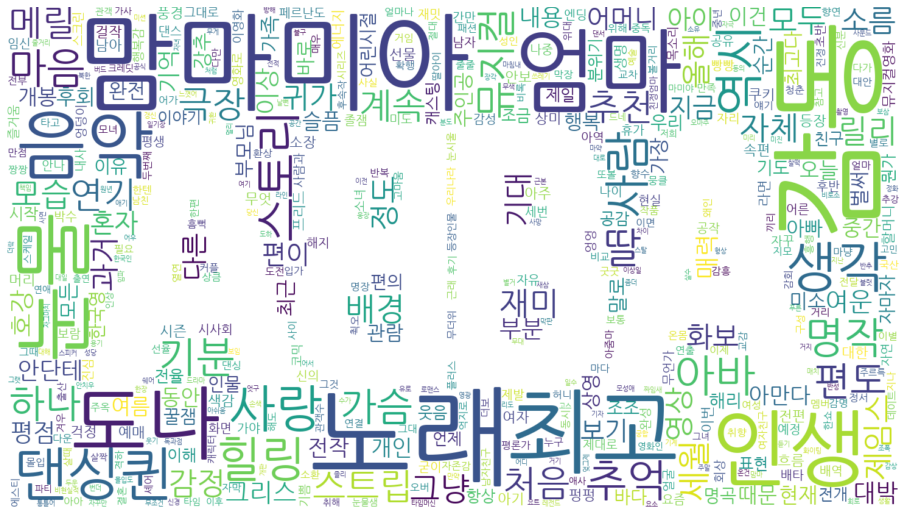

In [10]:
# wordcloud 그리기
from wordcloud import WordCloud

import numpy as np
from PIL import Image

# 직접 만든 mask 이미지 사용.
img_mask = np.array(Image.open('abba.png'))

wc_img = WordCloud(background_color='white', max_words=500,
                  font_path=r'C:\Windows\Fonts\NanumGothic.ttf', mask = img_mask)
                  

wc_img = wc_img.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt

# 잘 보이도록 표의 크기를 조정.
plt.figure(figsize=(16,12))
plt.imshow(wc_img, Interpolation="bilinear")
plt.axis("off")
plt.show()

## 3-1). 분류기 학습하기 - 개요

* **저는 평점이 8점 이상인 리뷰들은 pos 로, 그리고 평점이 4점 이하인 데이터들은 neg 로 학습시켰습니다.**


&nbsp;**NSMC**의 기준과는 조금 다르게 잡아봤습니다. 사실, 제가 리뷰 데이터들을 살펴봤을 때는 6점 정도만 되어도 사람들이 꽤나 부정적으로 평가하는 경우가 많아, **neg의 기준을 6점으로 잡을까** 생각도 해보았지만 중립적 데이터도 neg로 들어갈 위험성이 있을 것이라 판단해 4점 이하인 데이터로 잡게 되었습니다.


* **처음에는 맘마 미아!2의 리뷰 데이터만 가지고 분류기를 학습시킨 후, 테스트를 해보았습니다. 근데 적중률이 심각히 낮았습니다.**


&nbsp;고민이 굉장히 많아졌었습니다. 교수님께서 하나의 영화에서 가져올 수 있는 리뷰 데이터의 최대치를 1000개로 잡아놓으셨고, 저는 1000개를 온전히 가져왔습니다. 그리고 교수님께서 영화 하나의 데이터만 분석해도 ok 라고 하셔서 당연히 1000개를 학습시키면 괜찮은 적중률을 보이는 모델이 학습될 것이라 생각했으나 저의 큰 오산이었습니다.  
&nbsp;**맘마 미아!2의 리뷰 데이터로 학습시킨 나이브 베이즈 분류기는 거의 모든 test에 대해 'pos'를 출력하였습니다.**


### Why? Because of Class Imbalance!

* **위와 같은 결과가 나타난 이유는 Class Imbalance 문제가 발생했기 때문이었습니다.**


&nbsp;맘마 미아!2의 리뷰 평점 데이터의 **pos : neg의 비율은 거의 9 : 1** 로, pos 쪽에 압도적으로 치우친 상태였습니다. 본 분류기는 0 혹은 1로 classification을 진행하는 **binary classification** 이기 때문에 **특정 데이터 양이 특정 class에 많이 쏠려있을 때 발생하는 class Imbalance** 는 학습 시 심각한 문제를 초래합니다.
&nbsp;맘마 미아!2의 데이터로만 학습을 시켰을 땐, **pos 클래스의 데이터가 너무 많았기 때문에 classifier가 pos 클래스가 나오도록 판단하는 방향으로 학습이 되어버리게 됩니다.**


* **Class Imbalance 문제를 해결하기 위해 캣츠 영화의 리뷰 데이터도 함께 가져오게 되었습니다.**


&nbsp;Class Imbalance 문제를 해결하기 위해서는 **training set에 쓰일 두 class에 대한 데이터를 최대한 1 : 1에 가깝게 맞춰주어야 합니다.** 맘마 미아!2 영화에서 pos에 대한 데이터를 대다수 제거하여 1 : 1 비율을 맞출 수도 있겠지만, 그렇게 하는 것보다는 **부정적인 리뷰가 많은 영화의 데이터를 가져와 1 : 1 데이터를 맞춰주는 것** 이 더 좋을 것 같다고 생각했습니다. 어찌 됐든 샘플링을 많이 하는 것은 정확도 향상에 도움이 될테니까요!


&nbsp;캣츠는 굉장히 악평을 많이 받았던 영화이고, 맘마 미아!2와 동일한 뮤지컬 장르의 영화이기 때문에 이 둘을 함께 샘플링하여 training set으로 쓰면 좋겠다는 생각이 들어, 캣츠의 리뷰 데이터를 선택하게 되었습니다.


&nbsp;이러한 저의 선택은 **뮤지컬 영화에 특화된 긍정, 부정 분류기를 학습** 시켜볼 수 있었다는 장점과 **뮤지컬 영화에 특별히 많이 나오는 단어만 학습이 되어 다른 장르의 영화에서는 제대로 동작하지 않는 분류기를 학습** 시키게 되었다는 일장일단 현상을 초래했다고 생각합니다.


&nbsp;다음은 분류기를 학습시키기 위한 전처리에 사용한 코드들입니다.

In [11]:
from nltk.tokenize import word_tokenize
import nltk

In [12]:
# training set 만들기
train = []

# 추출한 자료에 pos 리뷰와 neg 리뷰가 각각 몇 개씩 있는지 count.
pos_count = 0
neg_count = 0

for i in range(0, len(review_and_rating)):
    # rating이 8점 이상이면 positive한 리뷰로 분류.
    if review_and_rating[i][1] >= 8:
        train.append((review_and_rating[i][0], 'pos', review_and_rating[i][2]))
        pos_count += 1
        
    # rating이 4점 이하이면 negative한 리뷰로 분류.
    elif review_and_rating[i][1] <= 4:
        train.append((review_and_rating[i][0], 'neg', review_and_rating[i][2]))
        neg_count += 1

# 어떤 형식으로 저장되어있는지 일부만 출력해보기.
print(train[10:15])

print(len(train))

# pos와 neg 리뷰가 각각 몇 개 있는지 출력.
# 약 8 : 10의 비율. 거의 1 : 1에 근접해졌음을 알 수 있음.
print('pos : %d, neg : %d' %(pos_count, neg_count))

[('이유를 알 수 없는 눈물이 흐른다면당신은 이 영화를 그리워했던 사람이다.', 'pos', 0.033623910336239106), ('지난 10년이 1년도 채 안된 것처럼 감흥이 솟구쳤다.작지만 다 품고 있는 섬과 성당.푸른 바다 흰 요트들 위의 댄서.자유분방한 청춘 로맨스와 감동.ABBA의 주옥같은 명곡과 댄스.', 'pos', 0.044), ('노인 분들 대화는 나가서하세요', 'pos', 0.12073863636363637), ('다좋았는데 마지막 할머니는 꼭 넣어야했나. 그게 의문', 'pos', 0.14681440443213298), ('개봉하자마자 조조로 보고왔는데 영화보는 동안 웃기도하고 눈시울도 붉어지고 여튼 2시간 동안 눈과 귀가 행복했습니다ㅠㅠ 배우분들 연기도 대단하지만 노래가 전달하는 힘이 역시 대단하네요! 다들 영화관에서 꼭 보시길 바랍...', 'pos', 0.04552845528455285)]
1867
pos : 829, neg : 1038


## (번외1). test set 만들기

* **수집한 데이터의 일부를 test set으로 사용했습니다.**


&nbsp;보고서의 조건 중 하나인 'Test Case 3개 이상 입력하여 확인'과는 별개로, 수집한 리뷰 데이터를 기반으로 test set을 따로 만들어보았습니다. test set은 총 1867개의 training set의 10%인 **180개** 를 가져오도록 코딩했으며, 이 test set은 맘마 미아!2 영화에서 90개, 캣츠 영화에서 90개를 추출했습니다.


* **test set으로 사용할 데이터는 training set에서 제거시켰습니다.**


&nbsp;test set과 training set은 독립적이어야 합니다. training set에서 이미 학습시킨 데이터를 test set에 넣고 돌리면 당연히 높은 accuracy를 자랑할 것입니다. 이렇게 되면 제대로 된 test가 된 것이라고 볼 수가 없고, 본인이 엄청난 학습기를 만들어냈다는 착각에 빠질 뿐입니다.

In [13]:
# test_set 만들기
test_set = []

# test set을 제외하기 전의 training set 개수 출력.
print(len(train))

for i in range(0, 90):
    # test set에는 추가하고
    test_set.append(train[0])
    test_set.append(train[len(train)-1])
    
    # train에서는 해당 원소를 삭제해준다.
    del train[0]
    del train[len(train)-1]
        
print(test_set)
print(len(test_set))

# 180개가 제거된 1687개만 남음.
print(len(train))

1867


[('맘마미아1과 2의 차이는1을 처음봤을때느꼈던 감동에다시듣는ost가 반가움보단뭔지모를세월의 슬픔이느껴진 명작..', 'pos', 0.05314232902033272), ('인생 최악의 영화였다.. 잠자는게 시간이 덜아까울거같다.. 영화가 빨리 끝나갈 바란건 이번이 처음이었다..', 'neg', 0.0), ('줄거리를 제치더라도 댄싱퀸 장면은 언제나 아름답고 벅차오름', 'pos', 0.03483807654563297), ('진짜 인생최초로 영화보다 잠잤다', 'neg', 0.0), ('도나어린시절 너무예쁨', 'pos', 0.051357733175914994), ('예고편을 보고 한껏 기대한채 영화를 보러 갔습니다. 평점이 낮아서 살짝 망설였지만 이렇게까지 재미가 없을거라고 생각 못했어요. 보다가 중간에 졸았습니다. 아니 영화 시작한지 10분정도 지나서 졸았네요ㅋㅋㅋ 대사는 별...', 'neg', 0.0), ('기자 평론가 평점 저게 말이냐?ㅋㅋ이게 엉성한스토리면 신과함께는 얼마나 개판이냐', 'pos', 0.1712907117008444), ('영화보다가 첨으로 잤어요 영문모를 스토리진행이던데.. 노래만 해대고, 뮤지컬이 싫어질 뻔 했습니다. 푹 자다가 노래땜에 깨면 짜증날 정도로요. 뛰쳐나가려다가 잠깨고 중반부터 봤는데 뒤로 갈 수록 재밌긴 했어요', 'neg', 0.0), ('추억은 슬프기도하고 행복하기도하고 아름답기도하다.', 'pos', 0.03733528550512445), ('노래만 좋음.. 스토리 개연성이 너무 없음', 'neg', 0.0), ('해리랑 빌 배 타고 등장하면서 댄싱퀸 나올때 소름돋았다', 'pos', 0.02825278810408922), ('고양이가 등장하는 야동을 보는 느낌이었다', 'neg', 0.0), ('와 공작 신과함께 독과점 때문에 맘마미아를 못보다니 이게 한국영화 현실인가', 'pos', 0.0860377358490566), ('고양이는 개가 아니다 하지만 이 영화는 개같다', 'neg', 0.0), ('맘마미

180
1687


* **train과는 별도의 list인 train_extra를 둬, 리뷰의 추천 수에 기반해 전처리한 새로운 train set을 만들었습니다.**

In [14]:
# test set 제거한 train set 기반으로 리뷰의 추천 수에 기반해 전처리한 새로운 train set 만들기.
train_extra = []

for i in range(0, len(train)):
    if train[i][2] < 0.5:
        train_extra.append(train[i])
    

# 어떤 형식으로 저장되어있는지 뒤에서부터 출력해보기.
print(train[-5:])

# 약 81개의 데이터가 제거됨.
print(len(train_extra))

[('백두산 중에 고민했는데 평보니 둘다 별로라고해서 캣츠는 외국영화니까 영상미가 멋있을거 같아서 봤는데 차라리 백두산을 보세요..영화보다가 안자는데 저절로 잠들었고 뛰쳐나가려다 억지로 봤습니다ㅎ 영화보다가 이렇게 괴롭긴...', 'neg', 0.16666666666666666), ('졸다가 중간에 극장 나온영화는 처음입니다', 'neg', 0.16666666666666666), ('다시 생각해도 조ㄴ나 빡침이딴 영화가 다 있어영화 보면서 다섯 팀 나감;생각나는거 1도 없음 OOO기같네', 'neg', 0.16666666666666666), ('뮤지컬 캣츠 오리지날 공연까지 3번 본 팬으로서...영화 넘 실망이 컸다. 쥬디 덴치의 연기가 중심이 되어준게 이 영화를 그나마 살림. 테일러 스위프트때문에 영화홍보는 확실히 된 듯... 제니퍼 허드슨 캐스팅이 제일...', 'neg', 0.16666666666666666), ('상영관에 30명정도 같이 보는데 6명 중간에 나가고 10분정도 주무시더라 돈아까워서 끝가지 않아있던 내가 대견스러웠다 올해 본영화중 최악이었다 제기랄 엄복동도 피했던 나인데', 'neg', 0.16666666666666666)]
1608


## 3-2). 분류기 학습하기 - 기존의 naive bayes 분류기 사용하기

* **Naive bayes classifier를 학습시키기 위한 작업들입니다.**


&nbsp;교수님께서 수업시간에 다루신 코드를 많이 참조하여 진행했습니다.

In [15]:
# pos_tokenize() 함수 정의
def pos_tokenize(raw_sent):
    pos_sent = []
    
    sent = okt.pos(raw_sent, norm=True, stem=True)    
    
    for tup in sent:        
        word, tag = tup[0], tup[1]
        word_tag = word + '/' + tag
        pos_sent.append(word_tag)
    
    return ' '.join(pos_sent)

In [16]:
# set()을 이용하여 train에 있는 문장들의 단어 목록을 집합으로 만들기.
all_words = set()

for tup in train:
    sent, label = tup[0], tup[1]    
    sent = pos_tokenize(sent)    # 직접 정의한 pos_tokenize 함수 이용
    words = word_tokenize(sent)
    for word in words:
        all_words.add(word)

print(all_words)

{'효과/Noun', 'a/Alpha', '둘째/Modifier', '비정상/Noun', '마녀/Noun', '크읅/Noun', '아쉽다/Adjective', '타워/Noun', '청춘/Noun', '찬사/Noun', '너머/Noun', '막장/Noun', '상태/Noun', '돌아보다/Verb', '아역떄문/Noun', '사용/Noun', 'ATMOS/Alpha', '그대로/Noun', '인지/Josa', '몸짓/Noun', '아들/Noun', '구/Modifier', '누균/Noun', '틀/Noun', '살림/Noun', '뮤비/Noun', '하품/Noun', '서운하다/Adjective', '흉물/Noun', '에/Foreign', '굴곡/Noun', '뒷/Modifier', '다음/Noun', '젤리/Noun', '7천원/Number', '일별/Noun', '토/Noun', '=/Punctuation', '베스트/Noun', '낚임/Noun', '둘/Noun', '다/Josa', '명정/Noun', '릴/Noun', '치고/Josa', '``', '솔직/Noun', '때/Noun', '당연하다/Adjective', '잊혀지다/Verb', '중년/Noun', '한국인/Noun', '개인/Noun', 'ㅋㅋㅠ/KoreanParticle', '하나/Noun', '짜임새/Noun', '예의/Noun', '네/Suffix', '짝/Noun', '따윈/Noun', '저쩌/Noun', '달동/Noun', '아프다/Adjective', '내한/Noun', '문/Noun', '영화평론가/Noun', 'ㅈㄹ/KoreanParticle', '캣/Noun', '핵폐기물/Noun', '꿀잠/Noun', '말로/Noun', 'day/Alpha', '시대/Noun', '존똑/Noun', '귀/Modifier', '바/Noun', '조금씩/Adverb', '하/Noun', '위기/Noun', '만이/Josa', '연결/Noun', '적임/Noun', '1일/Number', '나은

In [17]:
train_features = []

for tup in train:
    sent, label = tup[0], tup[1]
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)
    tmp = {set_word: (set_word in words) for set_word in all_words}
    sent_tup = (tmp, label)
    train_features.append(sent_tup)

len(train_features)

1687

* **most_informative_features의 결과에 고양이?**


&nbsp;고양이가 잔뜩 나오는 영화인 캣츠의 평점이 대체적으로 굉장히 좋지 않았던지라, **고양이가 나오는 평이면 매우 높은 확률로 negative로 분류하도록 분류기가 학습** 된 것을 확인할 수 있었습니다. 고양이라는 feature는 캣츠 영화에 국한된 단어라 추후 **분류기의 Overfitting** 문제를 유발할 수 있을 것이라 생각이 들었습니다. 전처리를 통해 고양이를 제거했으면 좀 더 일반화된 분류기 학습이 가능할 수 있지 않았을까, 하는 견해입니다.

In [18]:
classifier1 = nltk.NaiveBayesClassifier.train(train_features)
classifier1.show_most_informative_features()

Most Informative Features
                 눈물/Noun = True              pos : neg    =     40.2 : 1.0
                고양이/Noun = True              neg : pos    =     35.2 : 1.0
               함께/Adverb = True              pos : neg    =     24.4 : 1.0
                 힐링/Noun = True              pos : neg    =     22.8 : 1.0
                  돈/Noun = True              neg : pos    =     21.1 : 1.0
           아깝다/Adjective = True              neg : pos    =     19.5 : 1.0
                나가다/Verb = True              neg : pos    =     17.2 : 1.0
              소/Modifier = True              pos : neg    =     17.0 : 1.0
                 가슴/Noun = True              pos : neg    =     16.2 : 1.0
                 별로/Noun = True              neg : pos    =     15.8 : 1.0


* **학습이 꽤나 잘 된 것 같아 만족스럽다!**


&nbsp;**Test case 10개로 이루어진 리스트** 를 직접 만들어보고, test해봤습니다. 본디 classifier의 test case로는 class의 비율을 training set을 준비할 때처럼 **1 : 1의 비율로 준비하지 않는다고 들었습니다.** 실세계의 데이터는 1 : 1의 비율로 일정치 않고, **어디론가 skew된 경우** 가 대부분일 것이라고 생각하기 때문입니다.


* **이 문제는 위에 별도로 지정한 test set 리스트를 통해 해결하려고 합니다.**


&nbsp;training set의 일부를 test set으로 뽑아올 때는 이 안에 어떤 리뷰 데이터가 들어있는지 모르고 그냥 맘마 미아!2 에서 90개, 캣츠에서 90개를 뽑아온 것이기 때문에 좀 더 real world에서 보일 수 있는 실제 데이터의 양상과 유사할 것이라 생각합니다.


&nbsp;(test_sent는 부모님과 친구들에게 자문을 조금 구하여 재밌게 만들어보았습니다!)

In [19]:
# 직접 준비한 Test case 10개를 이용해 분류기가 잘 동작하는지 test해보기.
test_sent= ['절교하고 싶은 친구가 있다면 이 영화를 보여주세요', 
           '내일 지구가 멸망하면 오늘 봐야하는 영화.',
           '노래는 노래대로 남겨놓읍시다...',
           '꼭 보시길. 최고의 영화!!',
           '인생 영화입니다!',
           '보다가 중간에 나왔습니다...',
           '눈물이 멈추질 않는 감동 영화 ㅠㅜㅠㅜㅠ',
           'ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이런 것도 영화라고 만든 건가요;',
           '아바 노래 진심 미쳤네요,,',
           '여자친구랑 같이 보러갔다가 헤어지고 나왔습니다. 책임지세요.']

for i in range (len(test_sent)):
    print(test_sent[i])
    tokens = pos_tokenize(test_sent[i])
    words = word_tokenize(tokens)
    print(words)
    
    test_feature = {set_word: (set_word in words) for set_word in all_words}
    print(classifier1.classify(test_feature))
    print()

# test_feature를 모두 출력하면 너무 길게 나오기 때문에 이에 대한 출력은 생략.
# print(test_feature)

절교하고 싶은 친구가 있다면 이 영화를 보여주세요
['절교/Noun', '하고/Josa', '싶다/Verb', '친구/Noun', '가/Josa', '있다/Adjective', '이/Noun', '영화/Noun', '를/Josa', '보여주다/Verb']
neg

내일 지구가 멸망하면 오늘 봐야하는 영화.
['내일/Noun', '지구/Noun', '가/Josa', '멸망하다/Adjective', '오늘/Noun', '보다/Verb', '야하다/Adjective', '영화/Noun', './Punctuation']
pos

노래는 노래대로 남겨놓읍시다...
['노래/Noun', '는/Josa', '노래/Noun', '대로/Josa', '남기다/Verb', '...', '/Punctuation']
neg

꼭 보시길. 최고의 영화!!
['꼭/Noun', '보다/Verb', './Punctuation', '최고/Noun', '의/Josa', '영화/Noun', '!', '!', '/Punctuation']
pos

인생 영화입니다!
['인생/Noun', '영화/Noun', '이다/Adjective', '!', '/Punctuation']
pos

보다가 중간에 나왔습니다...
['보다/Verb', '중간/Noun', '에/Josa', '나오다/Verb', '...', '/Punctuation']
neg

눈물이 멈추질 않는 감동 영화 ㅠㅜㅠㅜㅠ
['눈물/Noun', '이/Josa', '멈추다/Verb', '않다/Verb', '감동/Noun', '영화/Noun', 'ㅠㅜㅠ/KoreanParticle']
pos

ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이런 것도 영화라고 만든 건가요;
['ㅋㅋㅋ/KoreanParticle', '이렇다/Adjective', '것/Noun', '도/Josa', '영화/Noun', '라고/Josa', '만들다/Verb', '건가/Noun', '요/Josa', ';', '/Punctuation']
neg

아바 노래 진심 미쳤네요,,
['아바/Noun', '노래/

## 3-3) 직접 만든 Naive Bayes Classifier로 분류해보기


* 교수님께서 강의에서 소개하신 MyNaiveBayesClassifier를 가져와 사용해봤습니다.


&nbsp;다른 분류기에서 동일한 training set으로 학습한 후, 동일한 test set으로 test를 해봤을 때의 accuracy가 어떨지 분석해보고 싶어져, 교수님께서 강의에서 소개하신 코드를 가져와 사용해보았습니다. 전부 그대로 사용한 것은 아니고, **train() 함수** 와 **classify() 함수** 에는 약간의 수정이 가해졌습니다. 그 내용은 다음과 같습니다 :


* 본래 MyNaiveBayesClassifier에서는 train() 함수에서 parameter로 file name을 넘겨주도록 되어있었으나, 본 프로그램에서는 파일을 사용하지 않기 때문에 parameter로 **train_docs(리뷰 데이터) 리스트, train_label(긍, 부정 라벨) 리스트** 를 직접적으로 넘겨주게 수정했습니다.


* classify() 함수에 원래 return 값이 없이 출력되는 형식이었는데, **label string 데이터와 확률 값을 튜플 형태로 return** 하도록 코드를 수정했습니다. 이는 제가 별도로 정의한 정확도 계산 함수인 **accuracy_cal** 에서 사용하기 위함입니다.


* 소수점 형태로 나타나던 확률 값에 100을 곱해 백분율 형태로 표현하여 좀 더 직관적으로 이해할 수 있도록 하였습니다.

In [20]:
# 교수님께서 강의에서 소개하신 MyNaiveBayesClassifier를 조금 수정하여 사용.
import math 

            
class MyNaiveBayesClassifier:
    
    def __init__(self, k=0.5, use_morph=False):
        self.k = k
        self.word_probs = []
        self.use_morph = use_morph
        
        if self.use_morph:
            from konlpy.tag import Okt
            self.okt = Okt()

   
    def tokenize(self, sentence):
        if self.use_morph:
            pos_sent = []
            sent = self.okt.pos(sentence, norm=True, stem=True)    

            for tup in sent:        
                word, tag = tup[0], tup[1]       # tup: ('사과', 'Noun')
                word_tag = word + '/' + tag      # word_tag: '사과/Noun'
                pos_sent.append(word_tag)

            sentence = ' '.join(pos_sent)
            
        return sentence.split()

    def count_words(self, docs, labels):
        # 단어 사전(dictionary)를 만들고, 각 단어의 긍정/부정 문서 등장 횟수 세기
    
        count_dict = dict()
        for doc, label in zip(docs, labels):
            for word in self.tokenize(doc):
                if word not in count_dict:
                    count_dict[word] = {'pos': 0, 'neg': 0} # count_dict={'word1':{'pos':10, 'neg':5}, ...}
                count_dict[word][label] += 1
        
        print('num of words...', len(count_dict))
        return count_dict

    def word_prob(self, count_dict, pos_class_num, neg_class_num, k):
        # (단어, p(단어|긍정), p(단어|부정))의 튜플 형태로 만들어주어 리스트에 추가

        word_prob_list = []
        
        for key in count_dict:
            pos_word_num = count_dict[key]['pos']
            neg_word_num = count_dict[key]['neg']
    
            pos_class_prob = (pos_word_num + k) / (pos_class_num + 2*k)
            neg_class_prob = (neg_word_num + k) / (neg_class_num + 2*k)
            
            tup = (key, pos_class_prob, neg_class_prob)
            word_prob_list.append(tup)
            
        return word_prob_list

    def class_prob(self, word_prob_list, test_sentence, use_unseen=False):
        # p(긍정|문서), p(부정|문서) 계산
        
        test_words = self.tokenize(test_sentence)
        
        sent_log_pos_class_prob, sent_log_neg_class_prob = 0.0, 0.0
        
        for word, word_pos_class_prob, word_neg_class_prob in word_prob_list:
            if word in test_words:
                sent_log_pos_class_prob = sent_log_pos_class_prob + math.log(word_pos_class_prob) 
                sent_log_neg_class_prob = sent_log_neg_class_prob + math.log(word_neg_class_prob)
            else:
                if use_unseen:
                    sent_log_pos_class_prob = sent_log_pos_class_prob + math.log(1.0-word_pos_class_prob) 
                    sent_log_neg_class_prob = sent_log_neg_class_prob + math.log(1.0-word_neg_class_prob)                
            
        sent_pos_class_prob = math.exp(sent_log_pos_class_prob)
        sent_neg_class_prob = math.exp(sent_log_neg_class_prob)
        
        pos_class_prob = sent_pos_class_prob/(sent_pos_class_prob+sent_neg_class_prob)
        neg_class_prob = sent_neg_class_prob/(sent_pos_class_prob+sent_neg_class_prob)
        
        return pos_class_prob, neg_class_prob

    # file read가 아니기 때문에 train_docs와 train_labels를 직접 넘겨주도록 수정.
    def train(self, train_docs = [], train_labels = []):
        # load_data, count_words, word_prob 계산
        word_count_dict = self.count_words(train_docs, train_labels)
        
        pos_class_num = len([label for label in train_labels if label == 'pos'])
        neg_class_num = len([label for label in train_labels if label == 'neg'])
        
        self.word_probs = self.word_prob(word_count_dict, pos_class_num, neg_class_num, self.k)

    # accuracy_cal 함수에 사용하기 위해 출력 함수가 아닌, return 해주는 함수로 변경.
    def classify(self, doc, use_unseen=False):
        # class_prob 계산
        pos_class_prob, neg_class_prob = self.class_prob(self.word_probs, doc, use_unseen)
        
        # 백분율 단위로 환산하여 사용자들이 좀 더 보기 좋도록.
        if pos_class_prob > neg_class_prob:
            return 'pos', pos_class_prob * 100
            # print('pos', pos_class_prob * 100, end='')
            # print('%')
        else:
            return 'neg', neg_class_prob * 100
            # print('neg', neg_class_prob * 100, end='')
            # print('%')

## (번외2). 정확도(Accuracy) 계산 함수 만들기


* **앞서 직접 만든 test_set에 대해 test를 했을 때 classifier가 얼만큼의 정확도를 나타내는지를 print해주는 함수입니다.**


&nbsp;알고리즘은 단순합니다. 우선 매개변수로 넘어온 classifier의 종류에 따라 test를 다르게 해주어야 하기 때문에 if-else 문으로 구분을 합니다. classifier1과 classifier_extra는 주어진 naive bayes를 이용해서 만든 classifier이기 때문에 해당 테스트 과정을 따릅니다. test_set 리스트에 에 있는 모든 test set들에 대해 test를 하며 분류기가 예측한 값과 해당 test set이 pos인지 neg인지 평점을 기반으로 미리 판별한 label 값을 비교하여 **만약 분류기가 맞췄다면 accuracy 변수에 +1을 해줍니다.**


&nbsp;MyNaiveBayesClassifier로 분류한 경우에 대해서도 별도로 과정을 적어줍니다. 그리고 여기서도 마찬가지로 분류기가 맞췄다면 accuracy 변수에 +1을 해줍니다. **그리고 최종적으로 accuracy를 test_set의 len으로 나눠, 정확도를 구해 출력해줍니다.

In [21]:
# 앞서 직접 추출한 test_set를 넣어 test했을 때 정확도 계산해보는 함수.
def accuracy_cal(test_set, classifier):
    accuracy = 0

    if classifier == classifier1 or classifier == classifier_extra:
        for i in range(len(test_set)):
            test_sent = pos_tokenize(test_set[i][0])
            words = word_tokenize(test_sent)
            test_feature = {set_word: (set_word in words) for set_word in all_words}
    
            lable = classifier.classify(test_feature)
            if lable == test_set[i][1]:
                accuracy += 1
                
    else:
        for i in range(len(test_set)):
            lable, rate = classifier.classify(test_set[i][0], use_unseen)
    
            if (lable == test_set[i][1]):
                accuracy += 1

    print('정확도 : ', end='')
    print(accuracy / (len(test_set)) * 100, end='')
    print('%')

* **MyNaiveBayesClassifier 객체를 생성하여 분류기를 학습시킨 후, test하는 과정입니다.**


* **순서대로 띄어쓰기만 사용하고 형태소 분석기는 사용하지 않은 경우(classifier2), 형태소 분석기도 사용한 경우(classifier3) 입니다.**

In [22]:
# 띄어쓰기만 사용한 경우, 형태소 분석기는 사용하지 않음(use_morph = False)
classifier2 = MyNaiveBayesClassifier()

train_docs = []
train_labels = []

for i in range(0, len(review_and_rating)):
    train_docs.append(review_and_rating[i][0])
    if review_and_rating[i][1] >= 9:
        train_labels.append('pos')
    elif review_and_rating[i][1] <= 4:
        train_labels.append('neg')
        
train_docs

classifier2.train(train_docs, train_labels)

num of words... 10819


In [23]:
use_unseen = False

label = ''
rate = 0

for i in range(len(test_sent)):
    print(test_sent[i])
    # 앞서 정의한 test_sent를 이용해 test 해보기.
    label, rate = classifier2.classify(test_sent[i], use_unseen)
    print(label, rate, end='')
    print('%')
    print()

절교하고 싶은 친구가 있다면 이 영화를 보여주세요
neg 79.48486228940513%

내일 지구가 멸망하면 오늘 봐야하는 영화.
pos 80.43653148215562%

노래는 노래대로 남겨놓읍시다...
pos 60.86332969741041%

꼭 보시길. 최고의 영화!!
pos 96.27395697362971%

인생 영화입니다!
pos 51.8860122454054%

보다가 중간에 나왔습니다...
neg 96.62264565647301%

눈물이 멈추질 않는 감동 영화 ㅠㅜㅠㅜㅠ
pos 91.56658693388206%

ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이런 것도 영화라고 만든 건가요;
neg 87.04101219532342%

아바 노래 진심 미쳤네요,,
pos 92.25616030065656%

여자친구랑 같이 보러갔다가 헤어지고 나왔습니다. 책임지세요.
neg 93.61165237820327%



In [24]:
# 형태소 분석기를 이용한 경우
classifier3 = MyNaiveBayesClassifier(use_morph=True)
classifier3.train(train_docs, train_labels)

num of words... 4230


In [25]:
use_unseen = False

for i in range(len(test_sent)):
    print(test_sent[i])
    lable, rate = classifier3.classify(test_sent[i], use_unseen)
    print(lable, rate, end='')
    print('%')
    print()

절교하고 싶은 친구가 있다면 이 영화를 보여주세요
neg 76.045356857788%

내일 지구가 멸망하면 오늘 봐야하는 영화.
pos 93.09183511613853%

노래는 노래대로 남겨놓읍시다...
neg 52.164363174684446%

꼭 보시길. 최고의 영화!!
pos 94.61822837342531%

인생 영화입니다!
pos 62.97270020146954%

보다가 중간에 나왔습니다...
neg 89.0735450286038%

눈물이 멈추질 않는 감동 영화 ㅠㅜㅠㅜㅠ
pos 92.66075646012612%

ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이런 것도 영화라고 만든 건가요;
neg 52.39618665218929%

아바 노래 진심 미쳤네요,,
pos 66.72579016626344%

여자친구랑 같이 보러갔다가 헤어지고 나왔습니다. 책임지세요.
neg 73.12554391128052%



* **리뷰의 추천 수에 기반하여 만들어놓은 train_extra를 학습시킵니다.**

In [26]:
# 리뷰 추천 수 기반으로 만들어놓은 training set 학습 시키기
all_words = set()

for tup in train_extra:
    sent, label = tup[0], tup[1]    
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)
    for word in words:
        all_words.add(word)

print(all_words)

{'효과/Noun', 'a/Alpha', '둘째/Modifier', '비정상/Noun', '마녀/Noun', '크읅/Noun', '아쉽다/Adjective', '타워/Noun', '청춘/Noun', '찬사/Noun', '너머/Noun', '막장/Noun', '상태/Noun', '돌아보다/Verb', '아역떄문/Noun', 'ATMOS/Alpha', '그대로/Noun', '몸짓/Noun', '인지/Josa', '아들/Noun', '구/Modifier', '틀/Noun', '살림/Noun', '뮤비/Noun', '하품/Noun', '서운하다/Adjective', '흉물/Noun', '에/Foreign', '7천원/Number', '뒷/Modifier', '다음/Noun', '젤리/Noun', '일별/Noun', '토/Noun', '=/Punctuation', '둘/Noun', '다/Josa', '명정/Noun', '릴/Noun', '치고/Josa', '``', '솔직/Noun', '때/Noun', '당연하다/Adjective', '잊혀지다/Verb', '중년/Noun', '한국인/Noun', '개인/Noun', 'ㅋㅋㅠ/KoreanParticle', '하나/Noun', '짜임새/Noun', '예의/Noun', '네/Suffix', '짝/Noun', '따윈/Noun', '저쩌/Noun', '달동/Noun', '아프다/Adjective', '내한/Noun', '문/Noun', '영화평론가/Noun', 'ㅈㄹ/KoreanParticle', '캣/Noun', '핵폐기물/Noun', '꿀잠/Noun', '말로/Noun', '시대/Noun', '존똑/Noun', '귀/Modifier', '바/Noun', '조금씩/Adverb', '하/Noun', '위기/Noun', '만이/Josa', '연결/Noun', '적임/Noun', '1일/Number', '나은/Noun', '지나가다/Verb', '>', '예술/Noun', '볼/Noun', '하나같이/Adverb', '겁니다/Ve

In [27]:
train_features = []

for tup in train_extra:
    sent, label = tup[0], tup[1]
    sent = pos_tokenize(sent)
    words = word_tokenize(sent)
    tmp = {set_word: (set_word in words) for set_word in all_words}
    sent_tup = (tmp, label)
    train_features.append(sent_tup)

len(train_features)

classifier_extra = nltk.NaiveBayesClassifier.train(train_features)
classifier_extra.show_most_informative_features()

Most Informative Features
                고양이/Noun = True              neg : pos    =     58.0 : 1.0
                 눈물/Noun = True              pos : neg    =     40.0 : 1.0
                 캣츠/Noun = True              neg : pos    =     36.9 : 1.0
               함께/Adverb = True              pos : neg    =     23.5 : 1.0
                 힐링/Noun = True              pos : neg    =     22.7 : 1.0
                  돈/Noun = True              neg : pos    =     20.9 : 1.0
           아깝다/Adjective = True              neg : pos    =     18.9 : 1.0
                 엄마/Noun = True              pos : neg    =     17.0 : 1.0
              소/Modifier = True              pos : neg    =     16.9 : 1.0
                나가다/Verb = True              neg : pos    =     16.7 : 1.0


## (번외3). 직접 만든 accuracy_cal() 함수를 이용해 각 classifier의 정확도 측정


* **classifier1 > classifier_extra > classifier3 > classifier2 순으로 test_set에 대한 정확도가 높게 나왔습니다.**


&nbsp;생각보다 높은 정확도들을 보여 놀랐습니다. 하지만 **리뷰의 추천, 비추천 수를 기반으로 하여 전처리를 한 training set으로 학습시킨 classifier_extra의 정확도가 전처리 없이 학습시킨 classifier2의 정확도 보다 낮게 나와** 조금 실망스러웠습니다.

In [28]:
# 모든 classifier의 Accuracy를 직접 만든 함수를 이용해 측정.
accuracy_cal(test_set, classifier1)
accuracy_cal(test_set, classifier2)
accuracy_cal(test_set, classifier3)
accuracy_cal(test_set, classifier_extra)

정확도 : 87.77777777777777%
정확도 : 82.77777777777777%
정확도 : 86.11111111111111%
정확도 : 86.66666666666667%


## 4. 마치며...

* **extra한 시도를 해보았으나 눈에 띄는 성과를 얻지 못해 아쉽습니다.**


&nbsp;나름대로 야심차게 준비한 리뷰의 추천, 비추천 수로 전처리를 한 training set으로 만든 classifier_extra의 정확도가 오히려 그냥 classifier의 정확도보다 떨어졌다는 것이 가장 아쉬운 부분으로 남습니다.  
빅데이터를 모은 게 아닌, 약 2000개의 소규모 데이터를 학습시킨 것이라 저런 전처리를 통해 데이터를 안 그래도 없는 training set에서 빼는 것보다는 그냥 **모두 포함시켜, 전체 sample을 높이는 게 더 나은 방향** 이었으리라 생각합니다.


&nbsp;하지만 **무조건 accuracy가 높다고 해서 좋은 모델은 아니기 때문에 이 결과에 마냥 실망할 것도 아니라고 생각합니다.** Accuracy가 87.78%로 높게 나왔다고 해서 마냥 즐거워 할 일도 아니라는 것입니다. **여전히 class imbalance 문제가 존재하는 것은 아닌지, overfitting이 된 것은 아닌지 지켜볼 필요가 있습니다.** 추후 더 많은 리뷰 데이터를 모은 후, 추천 수 알고리즘을 적용시킨다면 조금 더 의미있는 결과가 나오지 않을까, 하는 기대감은 여전히 품고 있습니다.


* **굉장히 많은 것을 배운 과제, 그리고 한 학기였습니다.**


&nbsp;직접적으로 데이터를 이처럼 다뤄볼 기회가 정말 없었는데, 졸업 전에 좋은 것을 배우고 가는 것 같습니다. 정말 감사드립니다. 이런 저런 trouble에 부딪혀 머리를 싸매고 고민하는 과정에서 정말 많은 것을 배운 것 같습니다. 어려움 없이 순탄한 과제보다 이처럼 troubleshooting이 활발한 과제가 제겐 더 기억에 오래 남을 것 같습니다. **좋은 기회를 주셔서 정말 감사합니다! :)**